In [1]:
import numpy as np
from matplotlib import pyplot as plt
from plotting.nloSbottomXsec import xsecF

### New Scan

In [2]:
# data = np.genfromtxt('./CDFOdata_2112_01499v3_Fig9.dat',skip_header=7)
data = np.genfromtxt('./CDFOdata_2112_01499v3_Fig9_without_Stable.dat',skip_header=7)

In [3]:
masses_tauNew = []
lumi = 300.0
nMax = 250000
for pt in data:
    msb = pt[2]
    mn1 = pt[0]
    tau_ns = 1e9*pt[4]/3e8
    xsec = xsecF(msb)
    mcEvents = min(nMax,xsec*1e3*lumi)
    masses_tauNew.append([mn1,msb,tau_ns,mcEvents])

masses_tauNew = sorted(masses_tauNew)
print(len(masses_tauNew))
ptsNew = np.array(masses_tauNew)


395


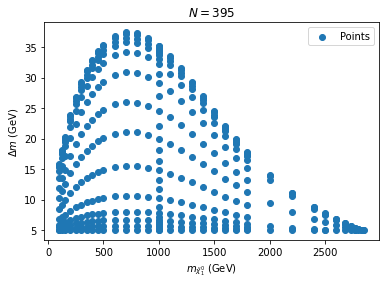

In [4]:

mN1 = ptsNew[:,0]
deltaM = ptsNew[:,1]-mN1
plt.scatter(mN1,deltaM,label='Points')
plt.legend()
# plt.xscale('log')
# plt.xlim(100,300)
# plt.ylim(25.,2000.)
plt.ylabel(r'$\Delta m$ (GeV)')
plt.xlabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
plt.title(r'$N = %i$' %len(ptsNew))
plt.show()

In [5]:
ptsNewLight = ptsNew[ptsNew[:,1] < 1500.]
print(len(ptsNewLight))

286


In [16]:
# ptsNewLong = ptsNew[(ptsNew[:,0] == 100.0) & ((ptsNew[:,1]-ptsNew[:,0]) > 10.0)]
ptsSel = ptsNew[
                    (ptsNew[:,0] > 150.0) 
#                     # & (ptsNew[:,2] > 0.1) 
                    & (ptsNew[:,0] <= 400.0) 
                    & ((ptsNew[:,1]-ptsNew[:,0]) >= 13.5)
                    & ((ptsNew[:,1]-ptsNew[:,0]) <= 18.5)
                ]
# ptsSel = ptsNewLight[:]
print(len(ptsSel))
# ptsIni = sorted([("%1.2f" %pt[0], "%1.2f" %pt[1], "%1.2e" %pt[2], "%i" %pt[3]) for pt in ptsSel])
ptsIni = sorted([("%1.2f" %pt[0], "%1.2f" %pt[1], "%1.2e" %pt[2], "75000") for pt in ptsSel])
print(str(ptsIni).replace("'", ""))

7
[(200.00, 214.31, 3.17e-01, 75000), (200.00, 217.17, 1.90e-01, 75000), (250.00, 265.78, 2.52e-01, 75000), (300.00, 317.00, 2.09e-01, 75000), (350.00, 363.51, 3.48e-01, 75000), (350.00, 368.02, 1.79e-01, 75000), (400.00, 414.06, 3.08e-01, 75000)]


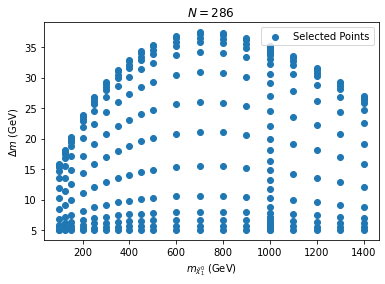

In [7]:

mN1 = ptsSel[:,0]
deltaM = ptsSel[:,1]-mN1
plt.scatter(mN1,deltaM,label='Selected Points')
plt.legend()
# plt.xscale('log')
# plt.xlim(100,300)
# plt.ylim(25.,2000.)
plt.ylabel(r'$\Delta m$ (GeV)')
plt.xlabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
plt.title(r'$N = %i$' %len(ptsSel))
plt.show()

In [8]:
ptsIni = sorted([("%1.2f" %pt[0], "%1.2f" %pt[1], "%1.2e" %pt[2]) for pt in ptsNewLight])
print(str(ptsIni).replace("'", ""))

[(100.00, 105.00, 3.98e+00), (100.00, 105.08, 3.75e+00), (100.00, 105.41, 3.09e+00), (100.00, 105.86, 2.52e+00), (100.00, 106.74, 1.79e+00), (100.00, 108.40, 1.05e+00), (100.00, 110.28, 6.00e-01), (100.00, 111.94, 3.49e-01), (100.00, 113.61, 1.77e-01), (100.00, 114.71, 9.01e-02), (100.00, 115.27, 5.15e-02), (100.00, 115.49, 3.64e-02), (100.00, 115.71, 2.15e-02), (100.00, 115.82, 1.40e-02), (1000.00, 1005.00, 4.63e+00), (1000.00, 1005.06, 4.28e+00), (1000.00, 1005.36, 3.13e+00), (1000.00, 1005.67, 2.52e+00), (1000.00, 1005.97, 2.10e+00), (1000.00, 1006.28, 1.80e+00), (1000.00, 1006.58, 1.56e+00), (1000.00, 1007.19, 1.21e+00), (1000.00, 1007.80, 9.66e-01), (1000.00, 1008.72, 7.15e-01), (1000.00, 1010.24, 4.64e-01), (1000.00, 1011.77, 3.22e-01), (1000.00, 1013.29, 2.33e-01), (1000.00, 1014.82, 1.76e-01), (1000.00, 1016.34, 1.36e-01), (1000.00, 1018.17, 1.03e-01), (1000.00, 1020.00, 8.06e-02), (1000.00, 1022.14, 6.20e-02), (1000.00, 1024.58, 4.69e-02), (1000.00, 1027.02, 3.59e-02), (1000.0

## Points requiring more stas

#### Split runs into at most 25k batches

In [9]:
masses_tauNew_split = []
for pt in masses_tauNew:
    if pt[1] > 500.:
        continue
    if pt[1] < 150.:
        continue
    if pt[1]-pt[0] < 20.0:
        continue
    if pt[3] < 50000:
        continue
    nbatches = pt[3]/25000.
    ntot = 0
    for n in range(int(nbatches)+1):
        nevts = min(25000,pt[3]-ntot)
        if nevts <= 0:
            continue
        ntot += nevts
        masses_tauNew_split.append([pt[0],pt[1],pt[2],nevts])

In [10]:
ptsIni = sorted([("%1.0f" %pt[0], "%1.1f" %pt[1], "%1.1e" %pt[2], "%i" %pt[3]) for pt in masses_tauNew_split])
print(str(ptsIni).replace("'", ""))
print(len(masses_tauNew_split))

[(150, 170.1, 1.4e-02, 25000), (150, 170.1, 1.4e-02, 25000), (150, 170.1, 1.4e-02, 25000), (150, 170.1, 1.4e-02, 25000), (150, 170.1, 1.4e-02, 25000), (150, 170.1, 1.4e-02, 25000), (150, 170.1, 1.4e-02, 25000), (150, 170.1, 1.4e-02, 25000), (150, 170.1, 1.4e-02, 25000), (150, 170.1, 1.4e-02, 25000), (150, 170.3, 7.9e-03, 25000), (150, 170.3, 7.9e-03, 25000), (150, 170.3, 7.9e-03, 25000), (150, 170.3, 7.9e-03, 25000), (150, 170.3, 7.9e-03, 25000), (150, 170.3, 7.9e-03, 25000), (150, 170.3, 7.9e-03, 25000), (150, 170.3, 7.9e-03, 25000), (150, 170.3, 7.9e-03, 25000), (150, 170.3, 7.9e-03, 25000), (200, 220.0, 1.0e-01, 25000), (200, 220.0, 1.0e-01, 25000), (200, 220.0, 1.0e-01, 25000), (200, 220.0, 1.0e-01, 25000), (200, 220.0, 1.0e-01, 25000), (200, 220.0, 1.0e-01, 25000), (200, 220.0, 1.0e-01, 25000), (200, 220.0, 1.0e-01, 25000), (200, 220.0, 1.0e-01, 25000), (200, 220.0, 1.0e-01, 25000), (200, 222.0, 5.3e-02, 25000), (200, 222.0, 5.3e-02, 25000), (200, 222.0, 5.3e-02, 25000), (200, 222

In [11]:
ptsIni = [("%1.2f" %pt[0], "%1.2f" %pt[1], "%1.2e" %pt[2]) for pt in ptsNewMoreStats]
print(str(ptsIni).replace("'", ""))

NameError: name 'ptsNewMoreStats' is not defined